In [1]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [15]:
#import 2018 data

csvpath_2018 = os.path.join('Resources', '2018.csv')
csv_2018 = pd.read_csv(csvpath_2018)
csv_2018.head(15)
csv_2018.dropna(how="all")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


slope:0.28
intercept:-0.62
R-squared: 0.6434
y=0.28x + -0.62


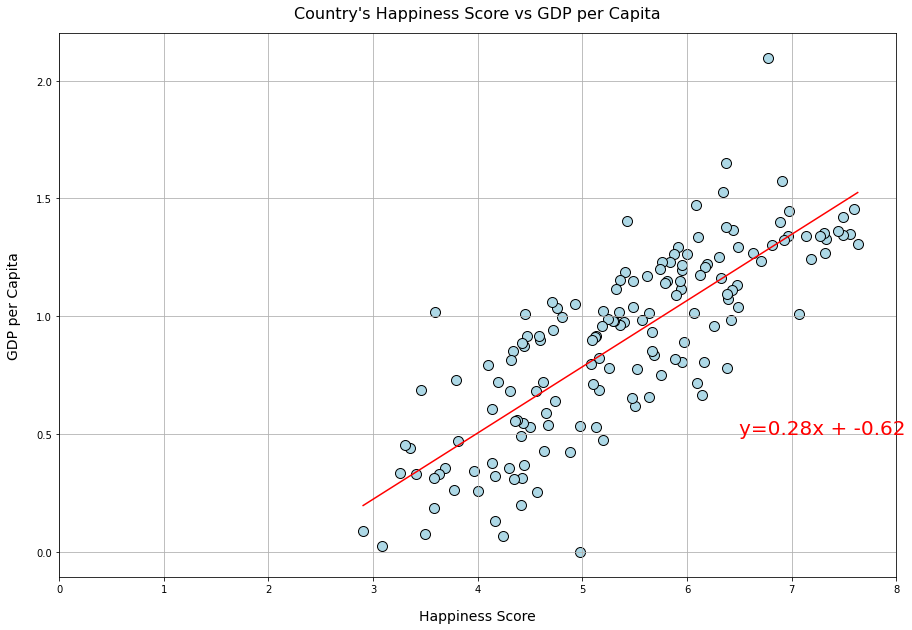

In [16]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["GDP per capita"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightblue", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.2
intercept:0.13
y=0.2x + 0.13


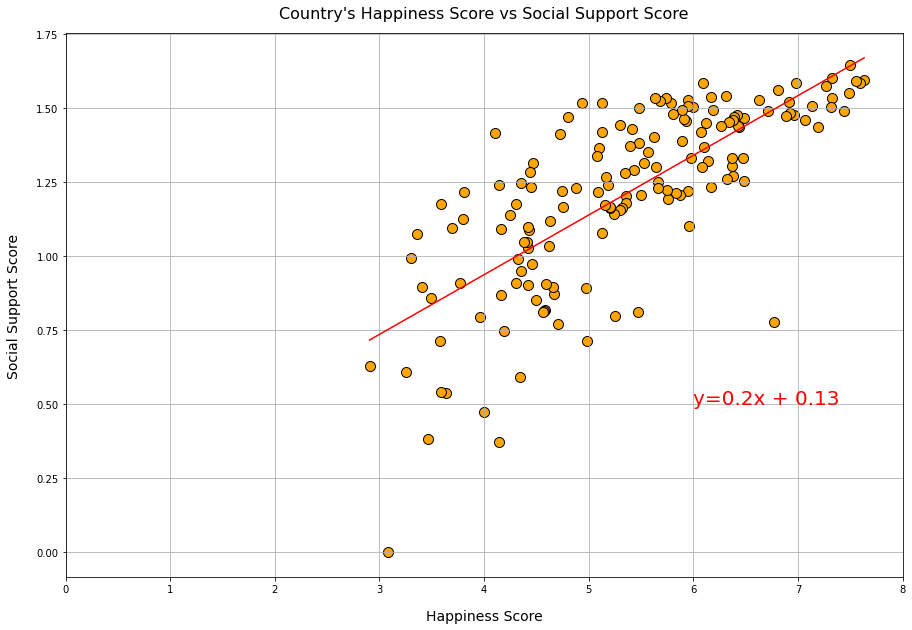

In [17]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["Social support"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="orange", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.5), fontsize =20, color = "red")
plt.show()

slope:0.17
intercept:-0.33
R-squared: 0.6019
y=0.17x + -0.33


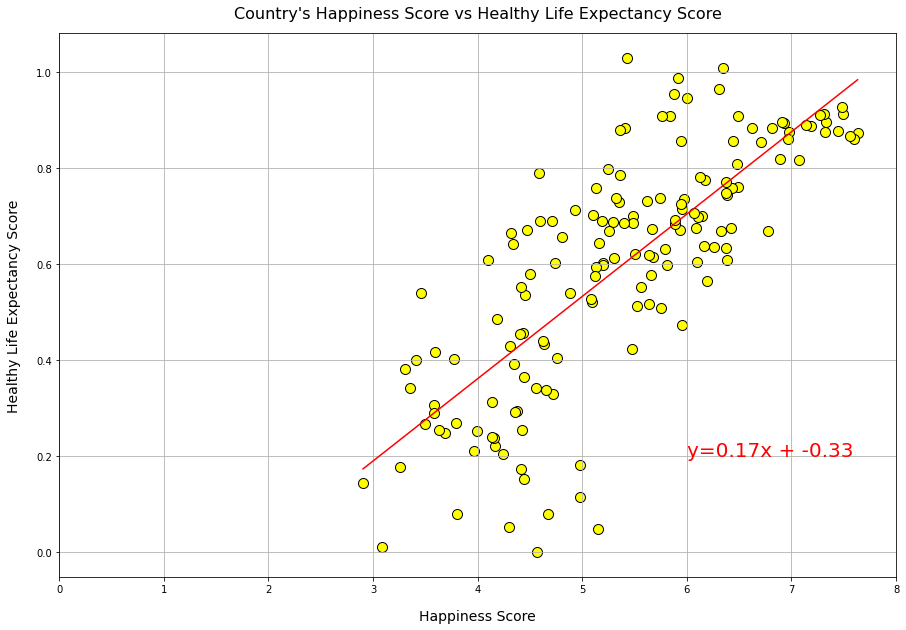

In [18]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["Healthy life expectancy"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="yellow", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.2), fontsize =20, color = "red")
plt.show()

slope:0.08
intercept:0.03
R-squared: 0.2962
y=0.08x + 0.03


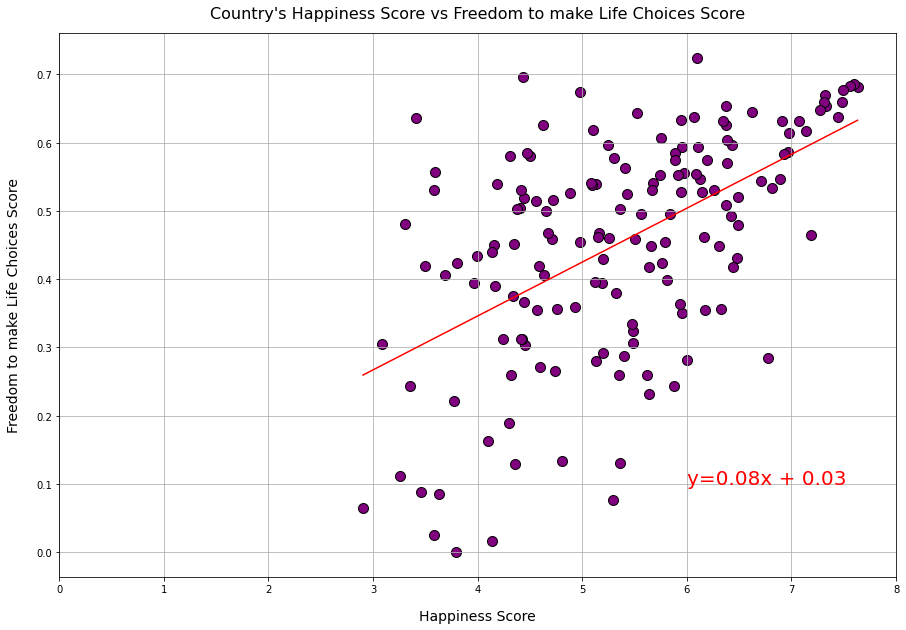

In [19]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["Freedom to make life choices"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6, 0.1), fontsize =20, color = "red")
plt.show()

slope:0.01
intercept:0.12
y=0.01x + 0.12


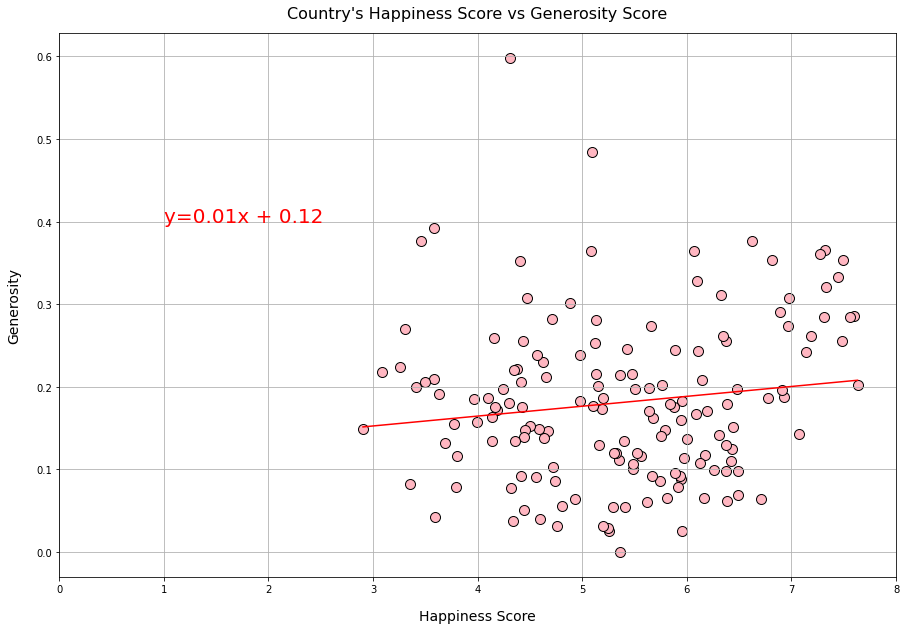

In [20]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["Generosity"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightpink", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(1, 0.4), fontsize =20, color = "red")
plt.show()

slope:nan
intercept:nan
R-squared: nan
y=nanx + nan


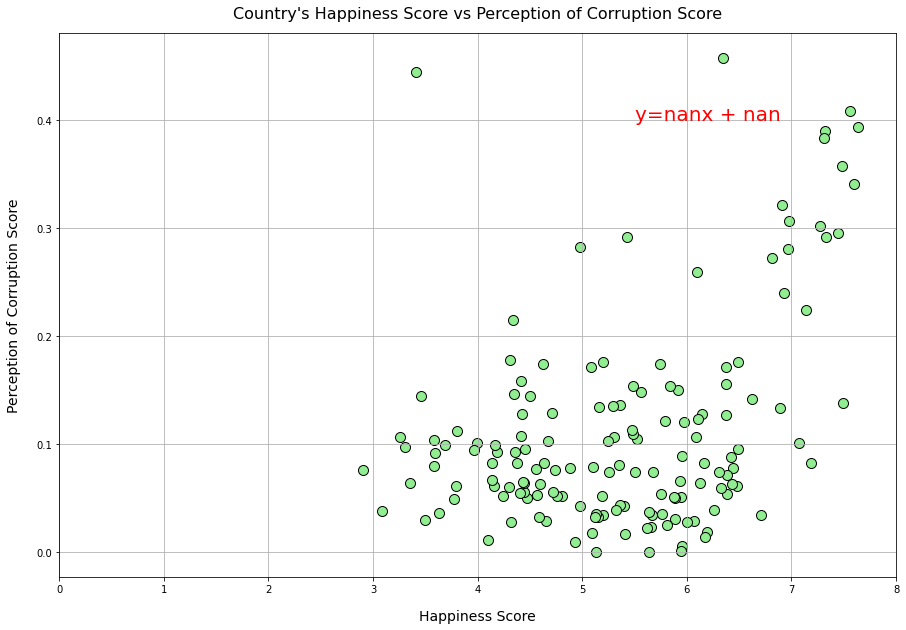

In [21]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = csv_2018["Score"]
y_values = csv_2018["Perceptions of corruption"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightgreen", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to implement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")
res = sts.linregress(x_values, y_values)
print(f"R-squared: {res.rvalue**2:.4f}")

#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.5, 0.4), fontsize =20, color = "red")
plt.show()